#Курсовой проект выполнила студенка группы ИД22-2

##Захарченко Жанна Джавдатовна

###Тема: Проведение анализа открытых данных Федерального казначейства

1. Импортируем библиотеки


In [1]:
# 1. Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Загрузка данных

In [62]:
# Чтение данных из Excel
file_path = 'list.xlsx'

In [63]:
# Загрузка всех листов в словарь, где ключи - это имена листов, а значения - DataFrame
all_sheets = pd.read_excel(file_path, sheet_name=None)
all_sheets

{'Лист1':                          Показатель, млрд. руб. / Год     2019     2020  \
 0                                      Расходы, всего  18214.5  22821.6   
 1                         Общегосударственные вопросы   1363.5   1507.7   
 2                                Национальная оборона   2997.4   3168.8   
 3   Национальная безопасность и правоохранительная...   2083.2   2226.6   
 4                              Национальная экономика   2827.1   3483.9   
 5                      Жилищно-коммунальное хозяйство    282.2    371.5   
 6                             Охрана окружающей среды    197.6    260.6   
 7                                         Образование    826.5    956.9   
 8                            Культура, кинематография    122.4    144.5   
 9                                     Здравоохранение    713.0   1334.4   
 10                                Социальная политика   4882.8   6990.3   
 11                        Физическая культура и спорт     81.4     75.3   
 12

#Вывод листов

###Лист 1

In [64]:
try:
    df_expenses = pd.read_excel(file_path, sheet_name='Лист1', index_col=0)
    print("Лист1 (Расходы):")
    print(df_expenses.head())
except Exception as e:
    print(f"Ошибка при чтении Лист1: {e}")

Лист1 (Расходы):
                                                       2019     2020     2021  \
Показатель, млрд. руб. / Год                                                    
Расходы, всего                                      18214.5  22821.6  24762.1   
Общегосударственные вопросы                          1363.5   1507.7   1759.5   
Национальная оборона                                 2997.4   3168.8   3573.6   
Национальная безопасность и правоохранительная ...   2083.2   2226.6   2335.9   
Национальная экономика                               2827.1   3483.9   4356.6   

                                                       2022     2023  
Показатель, млрд. руб. / Год                                          
Расходы, всего                                      31119.0  32353.7  
Общегосударственные вопросы                          2628.6   2324.4  
Национальная оборона                                 4678.7   6406.7  
Национальная безопасность и правоохранительная ...   2788.4 

###Лист 2

In [65]:
try:
    df_revenues = pd.read_excel(file_path, sheet_name='Лист2', index_col=0)
    print("\nЛист2 (Доходы):")
    print(df_revenues.head())
except Exception as e:
    print(f"Ошибка при чтении Лист2: {e}")


Лист2 (Доходы):
                                          2019      2020      2021      2022  \
Показатель, млрд. руб. / Год                                                   
Доходы, всего                         20 188,8  18 719,1  25 286,4  27 824,4   
Нефтегазовые доходы                    7 924,3   5 235,2   9 056,5  11 586,2   
Ненефтегазовые доходы                 12 264,5  13 483,8  16 229,9  16 238,2   
Связанные с внутренним производством   6 389,6   6 260,3   8 135,1   9 455,1   
НДС (внутренний)                       4 257,8   4 268,6   5 479,3   6 489,4   

                                          2023  
Показатель, млрд. руб. / Год                    
Доходы, всего                         29 124,0  
Нефтегазовые доходы                    8 822,3  
Ненефтегазовые доходы                 20 301,8  
Связанные с внутренним производством  10 306,4  
НДС (внутренний)                       7 182,4  


###Лист 3

In [66]:
try:
    df_gdp = pd.read_excel(file_path, sheet_name='Лист3', index_col=0)
    print("\nЛист3 (ВВП):")
    print(df_gdp.head())
    print("\n\n\n\n")
except Exception as e:
    print(f"Ошибка при чтении Лист3: {e}")


Лист3 (ВВП):
     ВВП в текущих ценах, млрд руб.
Год                                
2023                      172 148,3
2022                      155 188,9
2021                      135 773,8
2020                       107658.1
2019                       109608.3







##Производим очистку и преобразование данных для дальнейшей работы

In [67]:
def clean_and_convert(df):
    df = df.replace(',', '.', regex=True)
    df = df.replace('\s+', '', regex=True)
    return df.apply(pd.to_numeric, errors='coerce')

df_expenses = clean_and_convert(df_expenses)
df_revenues = clean_and_convert(df_revenues)
df_gdp = clean_and_convert(df_gdp)

In [68]:
df_expenses

,2019,2020,2021,2022,2023
"Показатель, млрд. руб. / Год",,,,,
"Расходы, всего",18214.5,22821.6,24762.1,31119.0,32353.7
Общегосударственные вопросы,1363.5,1507.7,1759.5,2628.6,2324.4
Национальная оборона,2997.4,3168.8,3573.6,4678.7,6406.7
Национальная безопасность и правоохранительная деятельность,2083.2,2226.6,2335.9,2788.4,3225.6
Национальная экономика,2827.1,3483.9,4356.6,4317.5,4125.6
Жилищно-коммунальное хозяйство,282.2,371.5,593.7,645.4,856.9
Охрана окружающей среды,197.6,260.6,405.1,355.1,347.3
Образование,826.5,956.9,1064.4,1319.2,1464.4
"Культура, кинематография",122.4,144.5,146.7,204.6,209.0


In [69]:
print(df_expenses.dtypes)

2019    float64
2020    float64
2021    float64
2022    float64
2023    float64
dtype: object


In [70]:
print(df_expenses.isna().sum())

2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64


In [71]:
df_revenues

,2019,2020,2021,2022,2023
"Показатель, млрд. руб. / Год",,,,,
"Доходы, всего",20188.8,18719.1,25286.4,27824.4,29124.0
Нефтегазовые доходы,7924.3,5235.2,9056.5,11586.2,8822.3
Ненефтегазовые доходы,12264.5,13483.8,16229.9,16238.2,20301.8
Связанные с внутренним производством,6389.6,6260.3,8135.1,9455.1,10306.4
НДС (внутренний),4257.8,4268.6,5479.3,6489.4,7182.4
Акцизы,946.7,900.3,1012.8,1147.2,1045.8
Налог на прибыль организаций,1185.0,1091.4,1552.4,1669.5,1918.6
Налог на доходы физических лиц,NaN,NaN,90.7,149.0,159.5
Связанные с импортом,3644.5,3748.8,4724.5,3777.6,5706.6


In [72]:
print(df_revenues.dtypes)

2019    float64
2020    float64
2021    float64
2022    float64
2023    float64
dtype: object


In [73]:
print(df_revenues.isna().sum())

2019    1
2020    1
2021    0
2022    0
2023    0
dtype: int64


In [74]:
df_gdp

,"ВВП в текущих ценах, млрд руб."
Год,
2023,172148.3
2022,155188.9
2021,135773.8
2020,107658.1
2019,109608.3


In [75]:
print(df_gdp.dtypes)

ВВП в текущих ценах, млрд руб.    float64
dtype: object


In [76]:
print(df_gdp.isna().sum())

ВВП в текущих ценах, млрд руб.    0
dtype: int64


Производим расчеты

Доля нефтегазовых доходов в общем объеме доходов по годам

In [85]:
results = {}

# Доля нефтегазовых доходов в общем объеме доходов по годам
total_revenues = df_revenues.loc['Доходы, всего'].replace(0, pd.NA)
results['Доля нефтегазовых доходов'] = (df_revenues.loc['Нефтегазовые доходы'] / total_revenues)*100
results['Доля нефтегазовых доходов'].round(2)

,0
2019,39.25
2020,27.97
2021,35.82
2022,41.64
2023,30.29


Считаем долю расходов на национальную экономику в общем объёме расходов

In [84]:
# Доля расходов на нац экономику в общем объеме расходов по годам
total_expenses = df_expenses.loc['Расходы, всего'].replace(0, pd.NA)
results['Доля расходов на нац экономику'] = (df_expenses.loc['Национальная экономика'] / total_expenses)*100
results['Доля расходов на нац экономику'].round(2)

,0
2019,15.52
2020,15.27
2021,17.59
2022,13.87
2023,12.75


Доля расходов на социальную политику в общем объёме расходов

In [86]:
# Доля расходов на соц политику по годам
results['Доля расходов на соц политику'] = (df_expenses.loc['Социальная политика'] / total_expenses)*100
results['Доля расходов на соц политику'].round(2)

,0
2019,26.81
2020,30.63
2021,26.96
2022,20.74
2023,20.07


Доля дефицита бюджета в ВВП

In [88]:
# Доля дефицита бюджета в ВВП по годам
budget_deficit = df_expenses.loc['Расходы, всего'] - df_revenues.loc['Доходы, всего']
results['Доля дефицита бюджета в ВВП'] = (budget_deficit / df_gdp['ВВП в текущих ценах, млрд руб.']) * 100
results['Доля дефицита бюджета в ВВП'].round(2)

,0
2019,-1.80
2020,3.81
2021,-0.39
2022,2.12
2023,1.88


Коэффициент эластичности доходов бюджета по ВВП по годам (вручную)

In [89]:
# Коэффициент эластичности доходов бюджета по ВВП по годам (вручную)
years = df_revenues.columns
elasticity = []

for i in range(1, len(years)):
    revenue_change = (df_revenues.loc['Доходы, всего', years[i]] - df_revenues.loc['Доходы, всего', years[i-1]]) / df_revenues.loc['Доходы, всего', years[i-1]]
    gdp_change = (df_gdp.loc[years[i], 'ВВП в текущих ценах, млрд руб.'] - df_gdp.loc[years[i-1], 'ВВП в текущих ценах, млрд руб.']) / df_gdp.loc[years[i-1], 'ВВП в текущих ценах, млрд руб.']
    elasticity.append(revenue_change / gdp_change)

elasticity_series = pd.Series(elasticity, index=[f"{years[i]}/{years[i-1]}" for i in range(1, len(years))])
results['Коэффициент эластичности доходов'] = elasticity_series.round(2)
results['Коэффициент эластичности доходов']

,0
2020/2019,4.09
2021/2020,1.34
2022/2021,0.70
2023/2022,0.43


 Индекс бюджетных расходов (в сопоставимых ценах)

In [92]:
# Индекс бюджетных расходов (в сопоставимых ценах)
results['Индекс бюджетных расходов'] = (df_expenses.loc['Расходы, всего'].pct_change() + 1).fillna(1)
results['Индекс бюджетных расходов'].round(2)

,"Расходы, всего"
2019,1.00
2020,1.25
2021,1.09
2022,1.26
2023,1.04


Коэффициент покрытия бюджетными расходами бюджетных доходов

In [93]:
# Коэффициент покрытия бюджетными расходами бюджетных доходов
coverage_ratio = df_revenues.loc['Доходы, всего'] / df_expenses.loc['Расходы, всего']
results['Коэффициент покрытия'] = coverage_ratio.round(2)

In [94]:
results['Коэффициент покрытия']

,0
2019,1.11
2020,0.82
2021,1.02
2022,0.89
2023,0.90


Дефицит бюджета на душу населения

In [95]:
# Дефицит бюджета на душу населения
population = 146.7  # млн человек
deficit_per_capita = (budget_deficit * 1e9) / (population * 1e6)
results['Дефицит на душу населения'] = (deficit_per_capita / 1000).round(1)  # в тыс. рублей
results['Дефицит на душу населения']

,0
2019,-13.5
2020,28.0
2021,-3.6
2022,22.5
2023,22.0


Отношение дефицита к расходам бюджета

In [96]:
# Отношение дефицита к расходам бюджета
deficit_to_expenses_ratio = (budget_deficit / df_expenses.loc['Расходы, всего']) * 100
results['Отношение дефицита к расходам'] = deficit_to_expenses_ratio.round(1)
results['Отношение дефицита к расходам']

,0
2019,-10.8
2020,18.0
2021,-2.1
2022,10.6
2023,10.0


Индекс физического объема ВВП (базовый год - 2019)

In [97]:
# Индекс физического объема ВВП (базовый год - 2019)
gdp_base_year = df_gdp.loc[2019, 'ВВП в текущих ценах, млрд руб.']
gdp_volume_index = df_gdp['ВВП в текущих ценах, млрд руб.'] / gdp_base_year
results['Индекс физического объема ВВП'] = gdp_volume_index.round(2)
results['Индекс физического объема ВВП']

,"ВВП в текущих ценах, млрд руб."
Год,
2023,1.57
2022,1.42
2021,1.24
2020,0.98
2019,1.00


In [98]:
# Вывод результатов
print("Результаты расчетов:")
for key, value in results.items():
    print(f"\n{key}:")
    for year, val in value.items():
        if year:
            print(f"  {year}: {val:.2f}")

Результаты расчетов:

Доля нефтегазовых доходов:
  2019: 39.25
  2020: 27.97
  2021: 35.82
  2022: 41.64
  2023: 30.29

Доля расходов на соц политику:
  2019: 26.81
  2020: 30.63
  2021: 26.96
  2022: 20.74
  2023: 20.07

Доля дефицита бюджета в ВВП:
  2019: -1.80
  2020: 3.81
  2021: -0.39
  2022: 2.12
  2023: 1.88

Коэффициент эластичности доходов:
  2020/2019: 4.09
  2021/2020: 1.34
  2022/2021: 0.70
  2023/2022: 0.43

Индекс бюджетных расходов:
  2019: 1.00
  2020: 1.25
  2021: 1.09
  2022: 1.26
  2023: 1.04

Коэффициент покрытия:
  2019: 1.11
  2020: 0.82
  2021: 1.02
  2022: 0.89
  2023: 0.90

Дефицит на душу населения:
  2019: -13.50
  2020: 28.00
  2021: -3.60
  2022: 22.50
  2023: 22.00

Отношение дефицита к расходам:
  2019: -10.80
  2020: 18.00
  2021: -2.10
  2022: 10.60
  2023: 10.00

Индекс физического объема ВВП:
  2023: 1.57
  2022: 1.42
  2021: 1.24
  2020: 0.98
  2019: 1.00


###Произведем расчеты по средним, медианным значениям и стандартным отклонениям для доходов и расходов за указанный период

Для доходов

In [99]:
# Расчет средних, медиан и стандартных отклонений
results_d = pd.DataFrame({
    'Среднее': df_revenues.mean(axis=1),
    'Медиана': df_revenues.median(axis=1),
    'Стандартное отклонение': df_revenues.std(axis=1, ddof=0) # ddof=0 для выборки из всей совокупности
})
results_d

,Среднее,Медиана,Стандартное отклонение
"Показатель, млрд. руб. / Год",,,
"Доходы, всего",24228.540000,25286.4,4115.537241
Нефтегазовые доходы,8524.900000,8822.3,2045.749225
Ненефтегазовые доходы,15703.640000,16229.9,2773.487081
Связанные с внутренним производством,8109.300000,8135.1,1613.397705
НДС (внутренний),5535.500000,5479.3,1171.572973
Акцизы,1010.560000,1012.8,85.032620
Налог на прибыль организаций,1483.380000,1552.4,307.082988
Налог на доходы физических лиц,133.066667,149.0,30.262885
Связанные с импортом,4320.400000,3777.6,795.367394


Для расходов

In [100]:
# Расчет средних, медиан и стандартных отклонений
results_ras = pd.DataFrame({
    'Среднее': df_expenses.mean(axis=1),
    'Медиана': df_expenses.median(axis=1),
    'Стандартное отклонение': df_expenses.std(axis=1, ddof=0)  # ddof=0 для выборки из всей совокупности
})
results_ras

,Среднее,Медиана,Стандартное отклонение
"Показатель, млрд. руб. / Год",,,
"Расходы, всего",25854.18,24762.1,5267.181040
Общегосударственные вопросы,1916.74,1759.5,483.951231
Национальная оборона,4165.04,3573.6,1264.481295
Национальная безопасность и правоохранительная деятельность,2531.94,2335.9,419.515843
Национальная экономика,3822.14,4125.6,587.814238
Жилищно-коммунальное хозяйство,549.94,593.7,204.341641
Охрана окружающей среды,313.14,347.3,74.154072
Образование,1126.28,1064.4,234.064106
"Культура, кинематография",165.44,146.7,34.851376


### Описательная статистика открытых данных Федерального казначейства

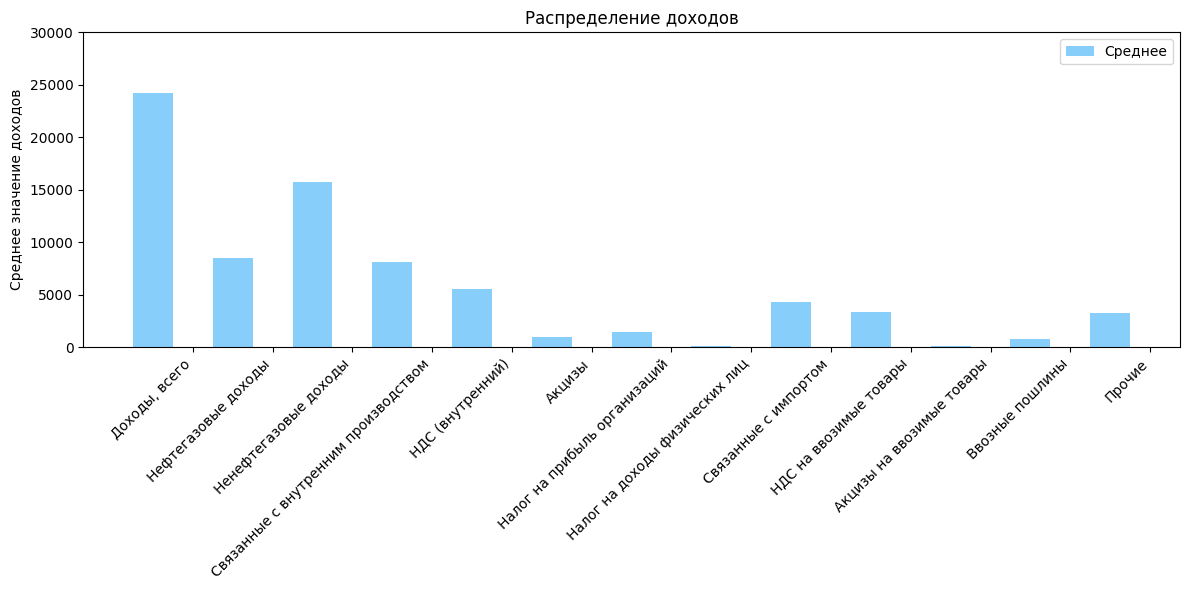

In [101]:
# Построение графика
plt.figure(figsize=(12, 6))

# Столбчатая диаграмма для средних значений
x = np.arange(len(results_d.index))  # Местоположение для каждой группы столбцов
width = 0.5  # Ширина столбцов

bars1 = plt.bar(x - width, results_d['Среднее'], width, label='Среднее', color='lightskyblue')

# Настройка графика
plt.ylabel('Среднее значение доходов')
plt.title('Распределение доходов')

# Установка пределов для оси Y
plt.ylim(0, 30000)  # Установите здесь нужные пределы

plt.xticks(x, results_d.index, rotation=45, ha='right')
plt.legend()

# Показ графика
plt.tight_layout()
plt.show()



<ipython-input-102-8bb6e0a4ec3b>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


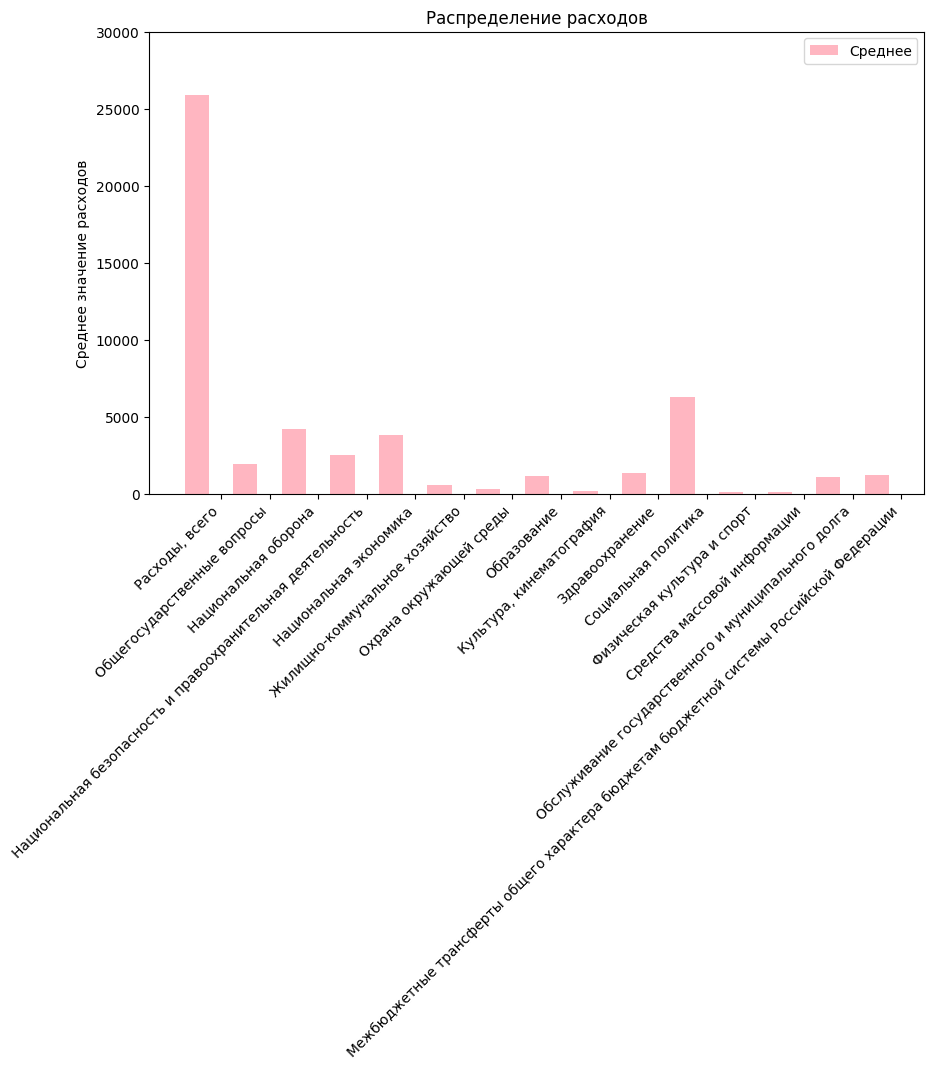

In [102]:
# Построение графика
plt.figure(figsize=(10, 6))

# Столбчатая диаграмма для средних значений
x = np.arange(len(results_ras.index))  # Местоположение для каждой группы столбцов
width = 0.5  # Ширина столбцов

bars1 = plt.bar(x - width, results_ras['Среднее'], width, label='Среднее', color='lightpink')

# Настройка графика
plt.ylabel('Среднее значение расходов')
plt.title('Распределение расходов')

# Установка пределов для оси Y
plt.ylim(0, 30000)  # Установите здесь нужные пределы

plt.xticks(x, results_ras.index, rotation=45, ha='right')
plt.legend()

# Показ графика
plt.tight_layout()
plt.show()

### График доходов и расходов федерального бюджета (2019-2023)

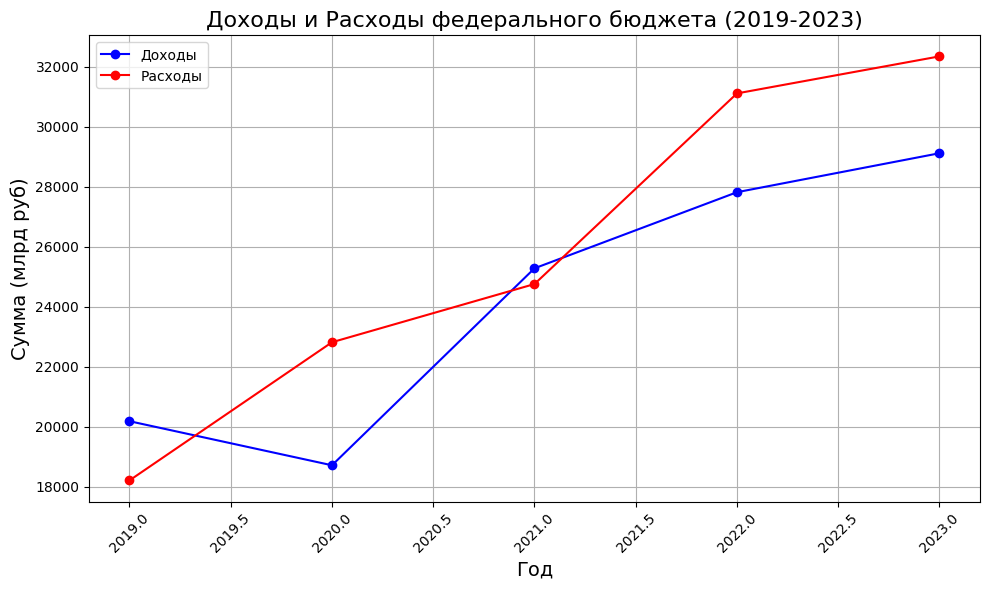

In [104]:
# Построение графика
plt.figure(figsize=(10, 6))

# Построение линий для доходов и расходов
plt.plot(df_revenues.loc['Доходы, всего'], marker='o', label='Доходы', color='blue')
plt.plot(df_expenses.loc['Расходы, всего'], marker='o', label='Расходы', color='red')

# Настройки графика
plt.title('Доходы и Расходы федерального бюджета (2019-2023)', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Сумма (млрд руб)', fontsize=14)
plt.xticks(rotation=45)  # Установить метки по годам
plt.grid()
plt.legend()
plt.tight_layout()  # Подгонка элементов графика

# Показ графика
plt.show()

###Обучение модели для прогнозов доходов и расходов Федерального казначейства на 2024-2026 гг.

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
# Модель для доходов
model_income = LinearRegression()

In [107]:
df_revenues

,2019,2020,2021,2022,2023
"Показатель, млрд. руб. / Год",,,,,
"Доходы, всего",20188.8,18719.1,25286.4,27824.4,29124.0
Нефтегазовые доходы,7924.3,5235.2,9056.5,11586.2,8822.3
Ненефтегазовые доходы,12264.5,13483.8,16229.9,16238.2,20301.8
Связанные с внутренним производством,6389.6,6260.3,8135.1,9455.1,10306.4
НДС (внутренний),4257.8,4268.6,5479.3,6489.4,7182.4
Акцизы,946.7,900.3,1012.8,1147.2,1045.8
Налог на прибыль организаций,1185.0,1091.4,1552.4,1669.5,1918.6
Налог на доходы физических лиц,NaN,NaN,90.7,149.0,159.5
Связанные с импортом,3644.5,3748.8,4724.5,3777.6,5706.6


In [108]:
income_data=df_revenues.T
income_data

"Показатель, млрд. руб. / Год","Доходы, всего",Нефтегазовые доходы,Ненефтегазовые доходы,Связанные с внутренним производством,НДС (внутренний),Акцизы,Налог на прибыль организаций,Налог на доходы физических лиц,Связанные с импортом,НДС на ввозимые товары,Акцизы на ввозимые товары,Ввозные пошлины,Прочие
2019,20188.8,7924.3,12264.5,6389.6,4257.8,946.7,1185.0,NaN,3644.5,2837.4,90.3,716.9,2230.4
2020,18719.1,5235.2,13483.8,6260.3,4268.6,900.3,1091.4,NaN,3748.8,2933.5,102.1,713.2,3474.8
2021,25286.4,9056.5,16229.9,8135.1,5479.3,1012.8,1552.4,90.7,4724.5,3733.0,132.6,858.9,3370.2
2022,27824.4,11586.2,16238.2,9455.1,6489.4,1147.2,1669.5,149.0,3777.6,3063.4,103.8,610.4,3005.4
2023,29124.0,8822.3,20301.8,10306.4,7182.4,1045.8,1918.6,159.5,5706.6,4432.0,164.2,1110.4,4288.8


In [109]:
income_data=income_data.reset_index()
income_data

"Показатель, млрд. руб. / Год",index,"Доходы, всего",Нефтегазовые доходы,Ненефтегазовые доходы,Связанные с внутренним производством,НДС (внутренний),Акцизы,Налог на прибыль организаций,Налог на доходы физических лиц,Связанные с импортом,НДС на ввозимые товары,Акцизы на ввозимые товары,Ввозные пошлины,Прочие
0,2019,20188.8,7924.3,12264.5,6389.6,4257.8,946.7,1185.0,NaN,3644.5,2837.4,90.3,716.9,2230.4
1,2020,18719.1,5235.2,13483.8,6260.3,4268.6,900.3,1091.4,NaN,3748.8,2933.5,102.1,713.2,3474.8
2,2021,25286.4,9056.5,16229.9,8135.1,5479.3,1012.8,1552.4,90.7,4724.5,3733.0,132.6,858.9,3370.2
3,2022,27824.4,11586.2,16238.2,9455.1,6489.4,1147.2,1669.5,149.0,3777.6,3063.4,103.8,610.4,3005.4
4,2023,29124.0,8822.3,20301.8,10306.4,7182.4,1045.8,1918.6,159.5,5706.6,4432.0,164.2,1110.4,4288.8


In [110]:
X = income_data['index'].values.reshape(-1, 1)
y = income_data['Доходы, всего'].values  # Доходы как зависимая переменная
# Обучение модели
model_income.fit(X,y)

LinearRegression()

In [111]:
#  Прогноз на 3 года вперед
future_years = np.array([2024, 2025, 2026]).reshape(-1, 1)
future_income = model_income.predict(future_years)

In [112]:

# Создаем DataFrame из future_years и future_income
future_data_in = pd.DataFrame({
    'Год': future_years.flatten(),
    'Прогнозируемый доход, млрд руб.': future_income.flatten()
})

# Выводим таблицу
future_data_in

,Год,"Прогнозируемый доход, млрд руб."
0,2024,32321.25
1,2025,35018.82
2,2026,37716.39


In [113]:
# Модель для расходов
model_outcome = LinearRegression()

In [114]:
df_expenses

,2019,2020,2021,2022,2023
"Показатель, млрд. руб. / Год",,,,,
"Расходы, всего",18214.5,22821.6,24762.1,31119.0,32353.7
Общегосударственные вопросы,1363.5,1507.7,1759.5,2628.6,2324.4
Национальная оборона,2997.4,3168.8,3573.6,4678.7,6406.7
Национальная безопасность и правоохранительная деятельность,2083.2,2226.6,2335.9,2788.4,3225.6
Национальная экономика,2827.1,3483.9,4356.6,4317.5,4125.6
Жилищно-коммунальное хозяйство,282.2,371.5,593.7,645.4,856.9
Охрана окружающей среды,197.6,260.6,405.1,355.1,347.3
Образование,826.5,956.9,1064.4,1319.2,1464.4
"Культура, кинематография",122.4,144.5,146.7,204.6,209.0


In [115]:
outcome_data=df_expenses.T
outcome_data

"Показатель, млрд. руб. / Год","Расходы, всего",Общегосударственные вопросы,Национальная оборона,Национальная безопасность и правоохранительная деятельность,Национальная экономика,Жилищно-коммунальное хозяйство,Охрана окружающей среды,Образование,"Культура, кинематография",Здравоохранение,Социальная политика,Физическая культура и спорт,Средства массовой информации,Обслуживание государственного и муниципального долга,Межбюджетные трансферты общего характера бюджетам бюджетной системы Российской Федерации
2019,18214.5,1363.5,2997.4,2083.2,2827.1,282.2,197.6,826.5,122.4,713.0,4882.8,81.4,103.5,730.8,1003.1
2020,22821.6,1507.7,3168.8,2226.6,3483.9,371.5,260.6,956.9,144.5,1334.4,6990.3,75.3,121.1,784.2,1395.9
2021,24762.1,1759.5,3573.6,2335.9,4356.6,593.7,405.1,1064.4,146.7,1473.9,6675.8,70.9,114.0,1084.2,1107.7
2022,31119.0,2628.6,4678.7,2788.4,4317.5,645.4,355.1,1319.2,204.6,1533.0,6453.3,89.5,128.2,1403.4,1069.2
2023,32353.7,2324.4,6406.7,3225.6,4125.6,856.9,347.3,1464.4,209.0,1570.0,6492.7,71.4,122.1,1519.3,1530.4


In [116]:
outcome_data = outcome_data.reset_index()
outcome_data

"Показатель, млрд. руб. / Год",index,"Расходы, всего",Общегосударственные вопросы,Национальная оборона,Национальная безопасность и правоохранительная деятельность,Национальная экономика,Жилищно-коммунальное хозяйство,Охрана окружающей среды,Образование,"Культура, кинематография",Здравоохранение,Социальная политика,Физическая культура и спорт,Средства массовой информации,Обслуживание государственного и муниципального долга,Межбюджетные трансферты общего характера бюджетам бюджетной системы Российской Федерации
0,2019,18214.5,1363.5,2997.4,2083.2,2827.1,282.2,197.6,826.5,122.4,713.0,4882.8,81.4,103.5,730.8,1003.1
1,2020,22821.6,1507.7,3168.8,2226.6,3483.9,371.5,260.6,956.9,144.5,1334.4,6990.3,75.3,121.1,784.2,1395.9
2,2021,24762.1,1759.5,3573.6,2335.9,4356.6,593.7,405.1,1064.4,146.7,1473.9,6675.8,70.9,114.0,1084.2,1107.7
3,2022,31119.0,2628.6,4678.7,2788.4,4317.5,645.4,355.1,1319.2,204.6,1533.0,6453.3,89.5,128.2,1403.4,1069.2
4,2023,32353.7,2324.4,6406.7,3225.6,4125.6,856.9,347.3,1464.4,209.0,1570.0,6492.7,71.4,122.1,1519.3,1530.4


In [117]:
X = outcome_data['index'].values.reshape(-1, 1)
y = outcome_data['Расходы, всего'].values  # Доходы как зависимая переменная
# Обучение модели
model_outcome.fit(X,y)

LinearRegression()

In [118]:
# Шаг 4: Прогноз на 3 года вперед
future_years = np.array([2024, 2025, 2026]).reshape(-1, 1)
future_outcome = model_outcome.predict(future_years)

In [119]:

# Создаем DataFrame из future_years и future_income
future_data_out = pd.DataFrame({
    'Год': future_years.flatten(),
    'Прогнозируемый расход, млрд руб.': future_outcome.flatten()
})

# Выводим таблицу
future_data_out

,Год,"Прогнозируемый расход, млрд руб."
0,2024,36826.92
1,2025,40484.50
2,2026,44142.08


Расчет скользящего средного для доходов и расходов

In [120]:
moving_average_d= df_revenues.loc['Доходы, всего'].rolling(window=2).mean()
moving_average_ras = df_expenses.loc['Расходы, всего'].rolling(window=2).mean()

In [121]:
moving_average_d

,"Доходы, всего"
2019,NaN
2020,19453.95
2021,22002.75
2022,26555.40
2023,28474.20


In [122]:
moving_average_ras

,"Расходы, всего"
2019,NaN
2020,20518.05
2021,23791.85
2022,27940.55
2023,31736.35


###График прогноза доходов и расходов федерального бюджета в 2024-2026 гг.

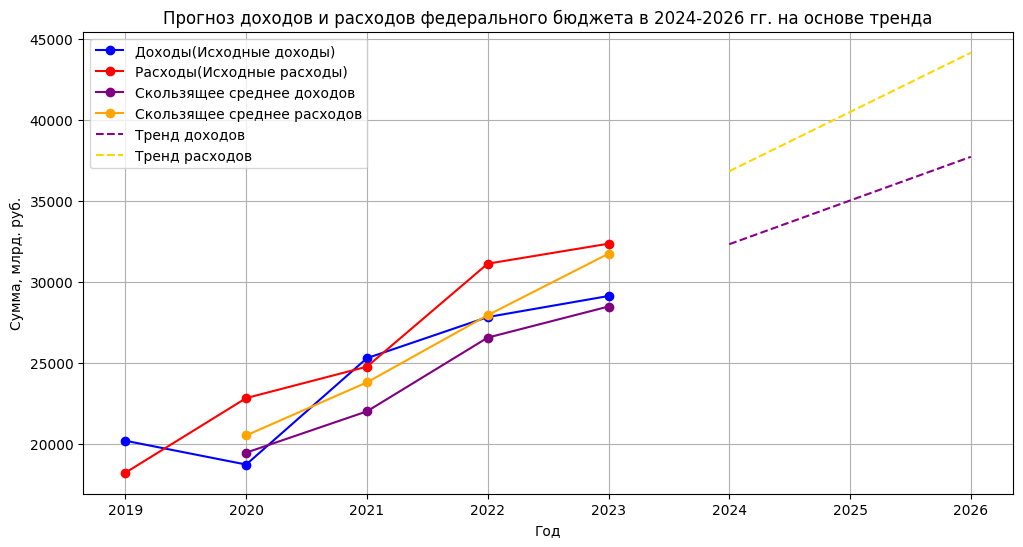

In [123]:
# График
plt.figure(figsize=(12, 6))
plt.plot(df_revenues.loc['Доходы, всего'], marker='o', label='Доходы(Исходные доходы)', color='blue')
plt.plot(df_expenses.loc['Расходы, всего'], marker='o', label='Расходы(Исходные расходы)', color='red')

plt.plot(moving_average_d.index, moving_average_d.values, marker='o', label='Скользящее среднее доходов', color='purple')
plt.plot(moving_average_ras.index, moving_average_ras.values, marker='o', label='Скользящее среднее расходов', color='orange')

# Трендовые линии
plt.plot(future_data_in['Год'], future_data_in['Прогнозируемый доход, млрд руб.'], color='darkmagenta', label='Тренд доходов', linestyle='--')
plt.plot(future_data_out['Год'], future_data_out['Прогнозируемый расход, млрд руб.'], color='gold', label='Тренд расходов', linestyle='--')

plt.title('Прогноз доходов и расходов федерального бюджета в 2024-2026 гг. на основе тренда')
plt.xlabel('Год')
plt.ylabel('Сумма, млрд. руб.')
plt.xticks(np.arange(2019, 2027, step=1))
plt.grid()
plt.legend()
plt.show()

###Диаграмма расходов федерального бюджета по отраслям за 2023 год

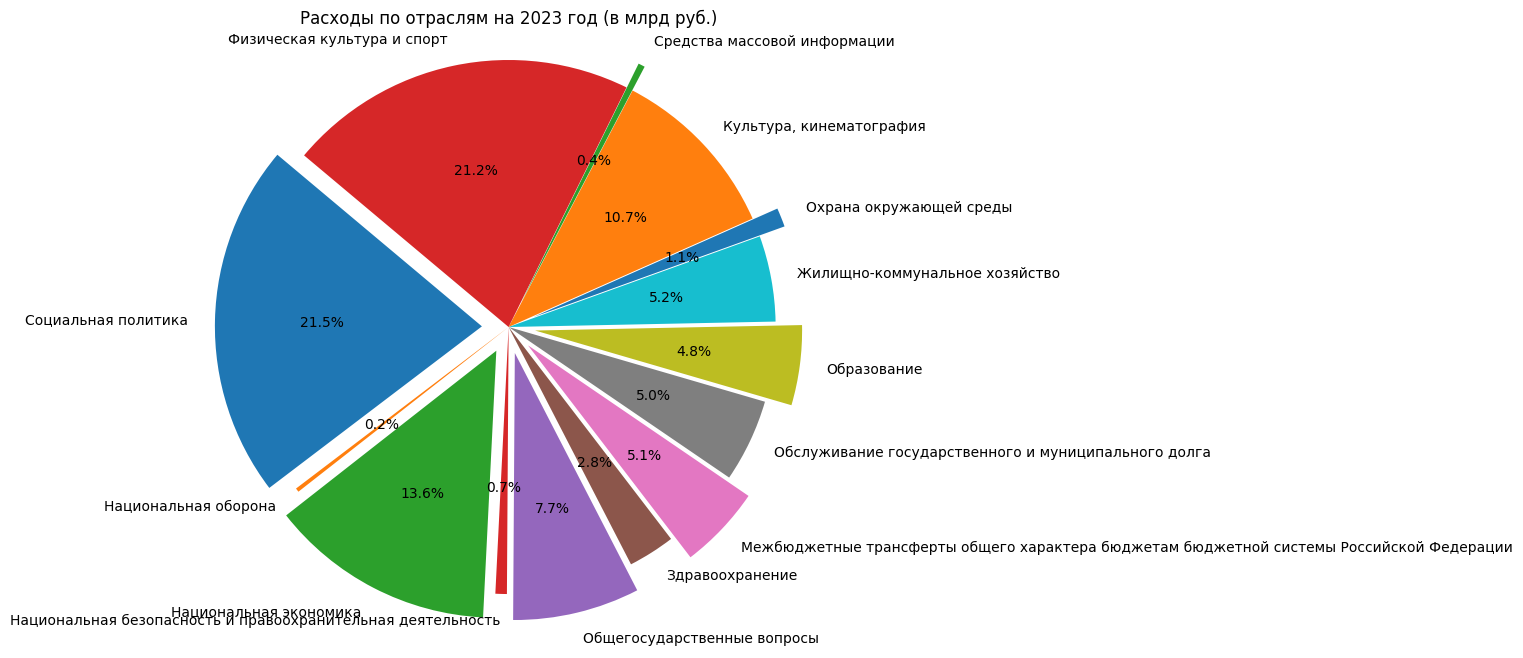

In [124]:
# Данные для 2023 года без "Расходы, всего"
expenses_2023 = df_expenses[2023].drop('Расходы, всего')

# Сортировка и чередование
expenses_sorted = expenses_2023.sort_values(ascending=False)
expenses_sorted.iloc[1::2] = expenses_sorted.iloc[1::2].sort_values()

# Настройка для выделения секторов
explode = [0.1 if i % 2 == 0 else 0 for i in range(len(expenses_sorted))]

# Построение круговой диаграммы
plt.figure(figsize=(12, 8))
plt.pie(expenses_sorted, labels=expenses_sorted.index, autopct='%1.1f%%', startangle=140, explode=explode)

plt.title('Расходы по отраслям на 2023 год (в млрд руб.)')
plt.axis('equal')  # Круговая диаграмма

# Отображение диаграммы
plt.show()


###Матрица корреляции расходов федерального бюджета по различным отраслям

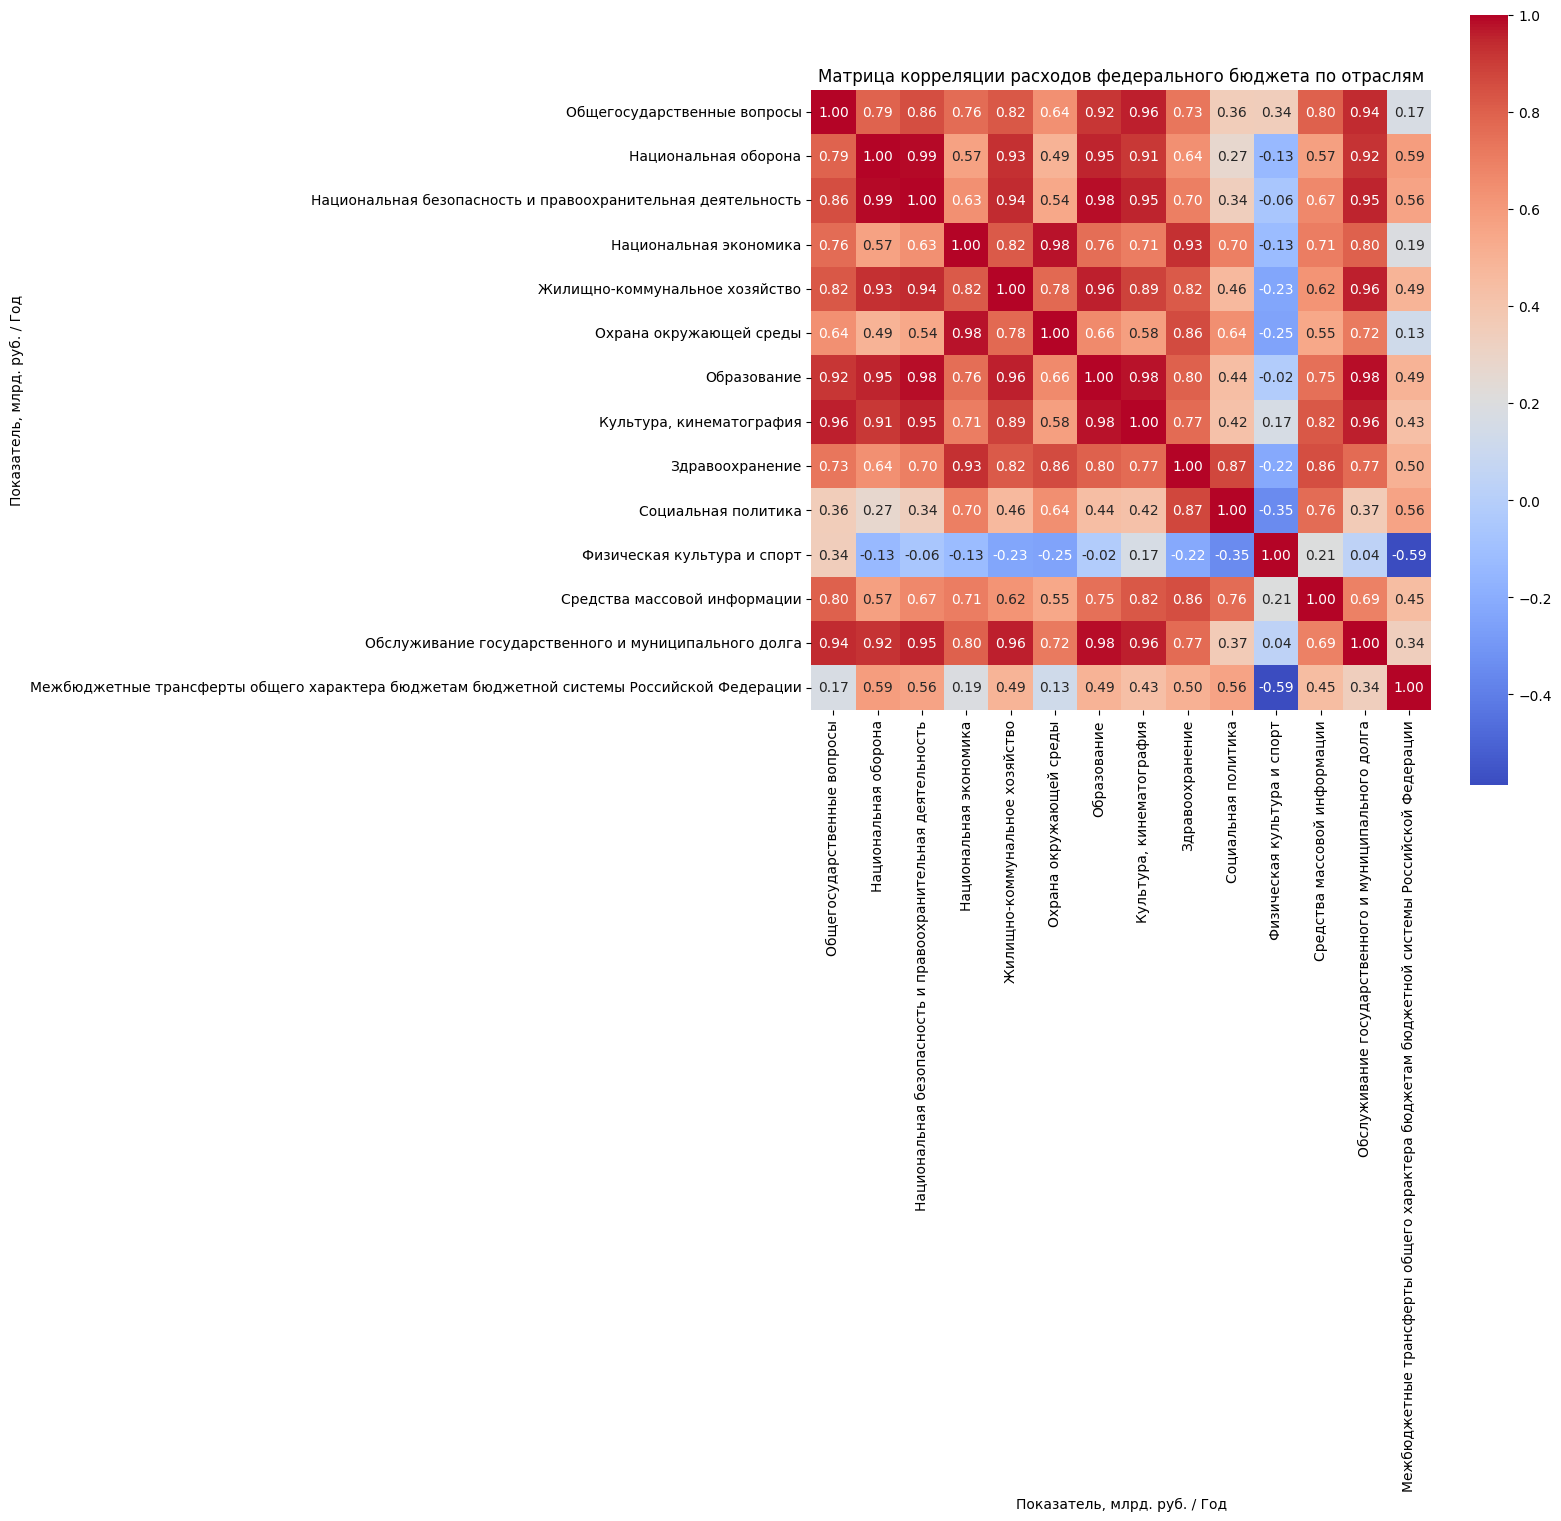

In [125]:

df_filtered = outcome_data.drop(columns=['index'])

# Рассчитаем корреляционную матрицу
correlation_matrix = df_filtered.drop(columns=['Расходы, всего']).corr()  # Удаляем колонку с годами

# Построение тепловой карты
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции расходов федерального бюджета по отраслям')
plt.show()